In [1]:
import math
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix

[2] Вывести в табличной форме статистику по датасету, включая:
- Размерность всего датасета
- Количество признаков
- Количество целевых классов и объектов в каждом из классов
- Процент объектов с неопределенными признаками
- Иные ключевые характеристики датасета

In [2]:
iris = pd.read_csv('dataset/iris.csv')

statistics = {"Shape": f"({iris.shape[0]}, {iris.shape[1]})",
              "Features": iris.shape[1] - 1,
              "Classes": iris['species'].nunique(),
              "Entries": f"{iris['species'].value_counts().reset_index()['count'].tolist()}",
              "missing": f'{iris.isnull().mean().sum() * 100} %'}

iris_statistics = pd.DataFrame(statistics, index=[0])
display(iris_statistics)

,Shape,Features,Classes,Entries,missing
0,"(150, 5)",4,3,"[50, 50, 50]",0.0 %


[3] Выполнить визуализацию датасета по всем парам выбранных количественных переменных, обозначая:
- в графиках с разными парами переменных объекты из разных классов
различными по форме и цвету точками
- в графиках с одной и той же парой переменных – гистограммы с достаточным числом разбиений (обычно – не менее 20), либо плотности распределения переменной по оси признака

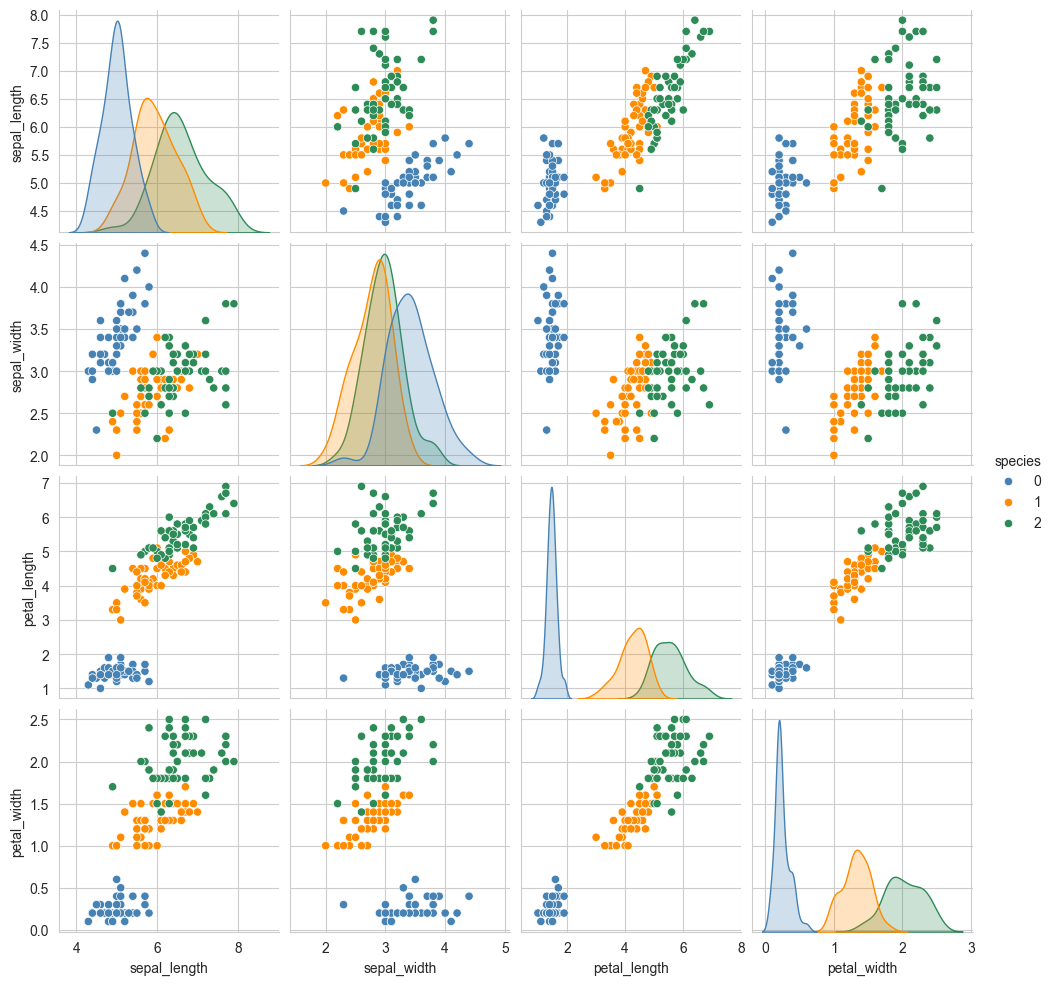

In [3]:
encoder = LabelEncoder()
iris['species'] = encoder.fit_transform(iris['species'])

sns.pairplot(iris, hue='species', palette=['steelblue', 'darkorange', 'seagreen'])
plt.show()

[4] В табличном варианте оценить, используя коэффициент корреляции Пирсона, степень сопряженности пар признаков-переменных:
- на всем датасете
- в каждом классе датасета

In [4]:
# iris_data = iris['']
iris_grouped = iris.groupby('species')

iris_correlation = iris.corr()
iris_correlation_grouped = iris_grouped.corr()

display(iris_correlation)
display(iris_correlation_grouped)

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


sepal_length  sepal_width  petal_length  petal_width
species                                                                   
0       sepal_length      1.000000     0.746780      0.263874     0.279092
        sepal_width       0.746780     1.000000      0.176695     0.279973
        petal_length      0.263874     0.176695      1.000000     0.306308
        petal_width       0.279092     0.279973      0.306308     1.000000
1       sepal_length      1.000000     0.525911      0.754049     0.546461
        sepal_width       0.525911     1.000000      0.560522     0.663999
        petal_length      0.754049     0.560522      1.000000     0.786668
        petal_width       0.546461     0.663999      0.786668     1.000000
2       sepal_length      1.000000     0.457228      0.864225     0.281108
        sepal_width       0.457228     1.000000      0.401045     0.537728
        petal_length      0.864225     0.401045      1.000000     0.322108
        petal_width       0.281108     0.537728      0.322108     1.000000

[5] Выбрать пару целевых классов и все количественные признаки.
Используя метод LDA (линейный дискриминантный анализ), построить решающую функцию алгоритма, разграниченные решающей функцией зоны и отдельные объекты классов на всех парах количественных признаков.

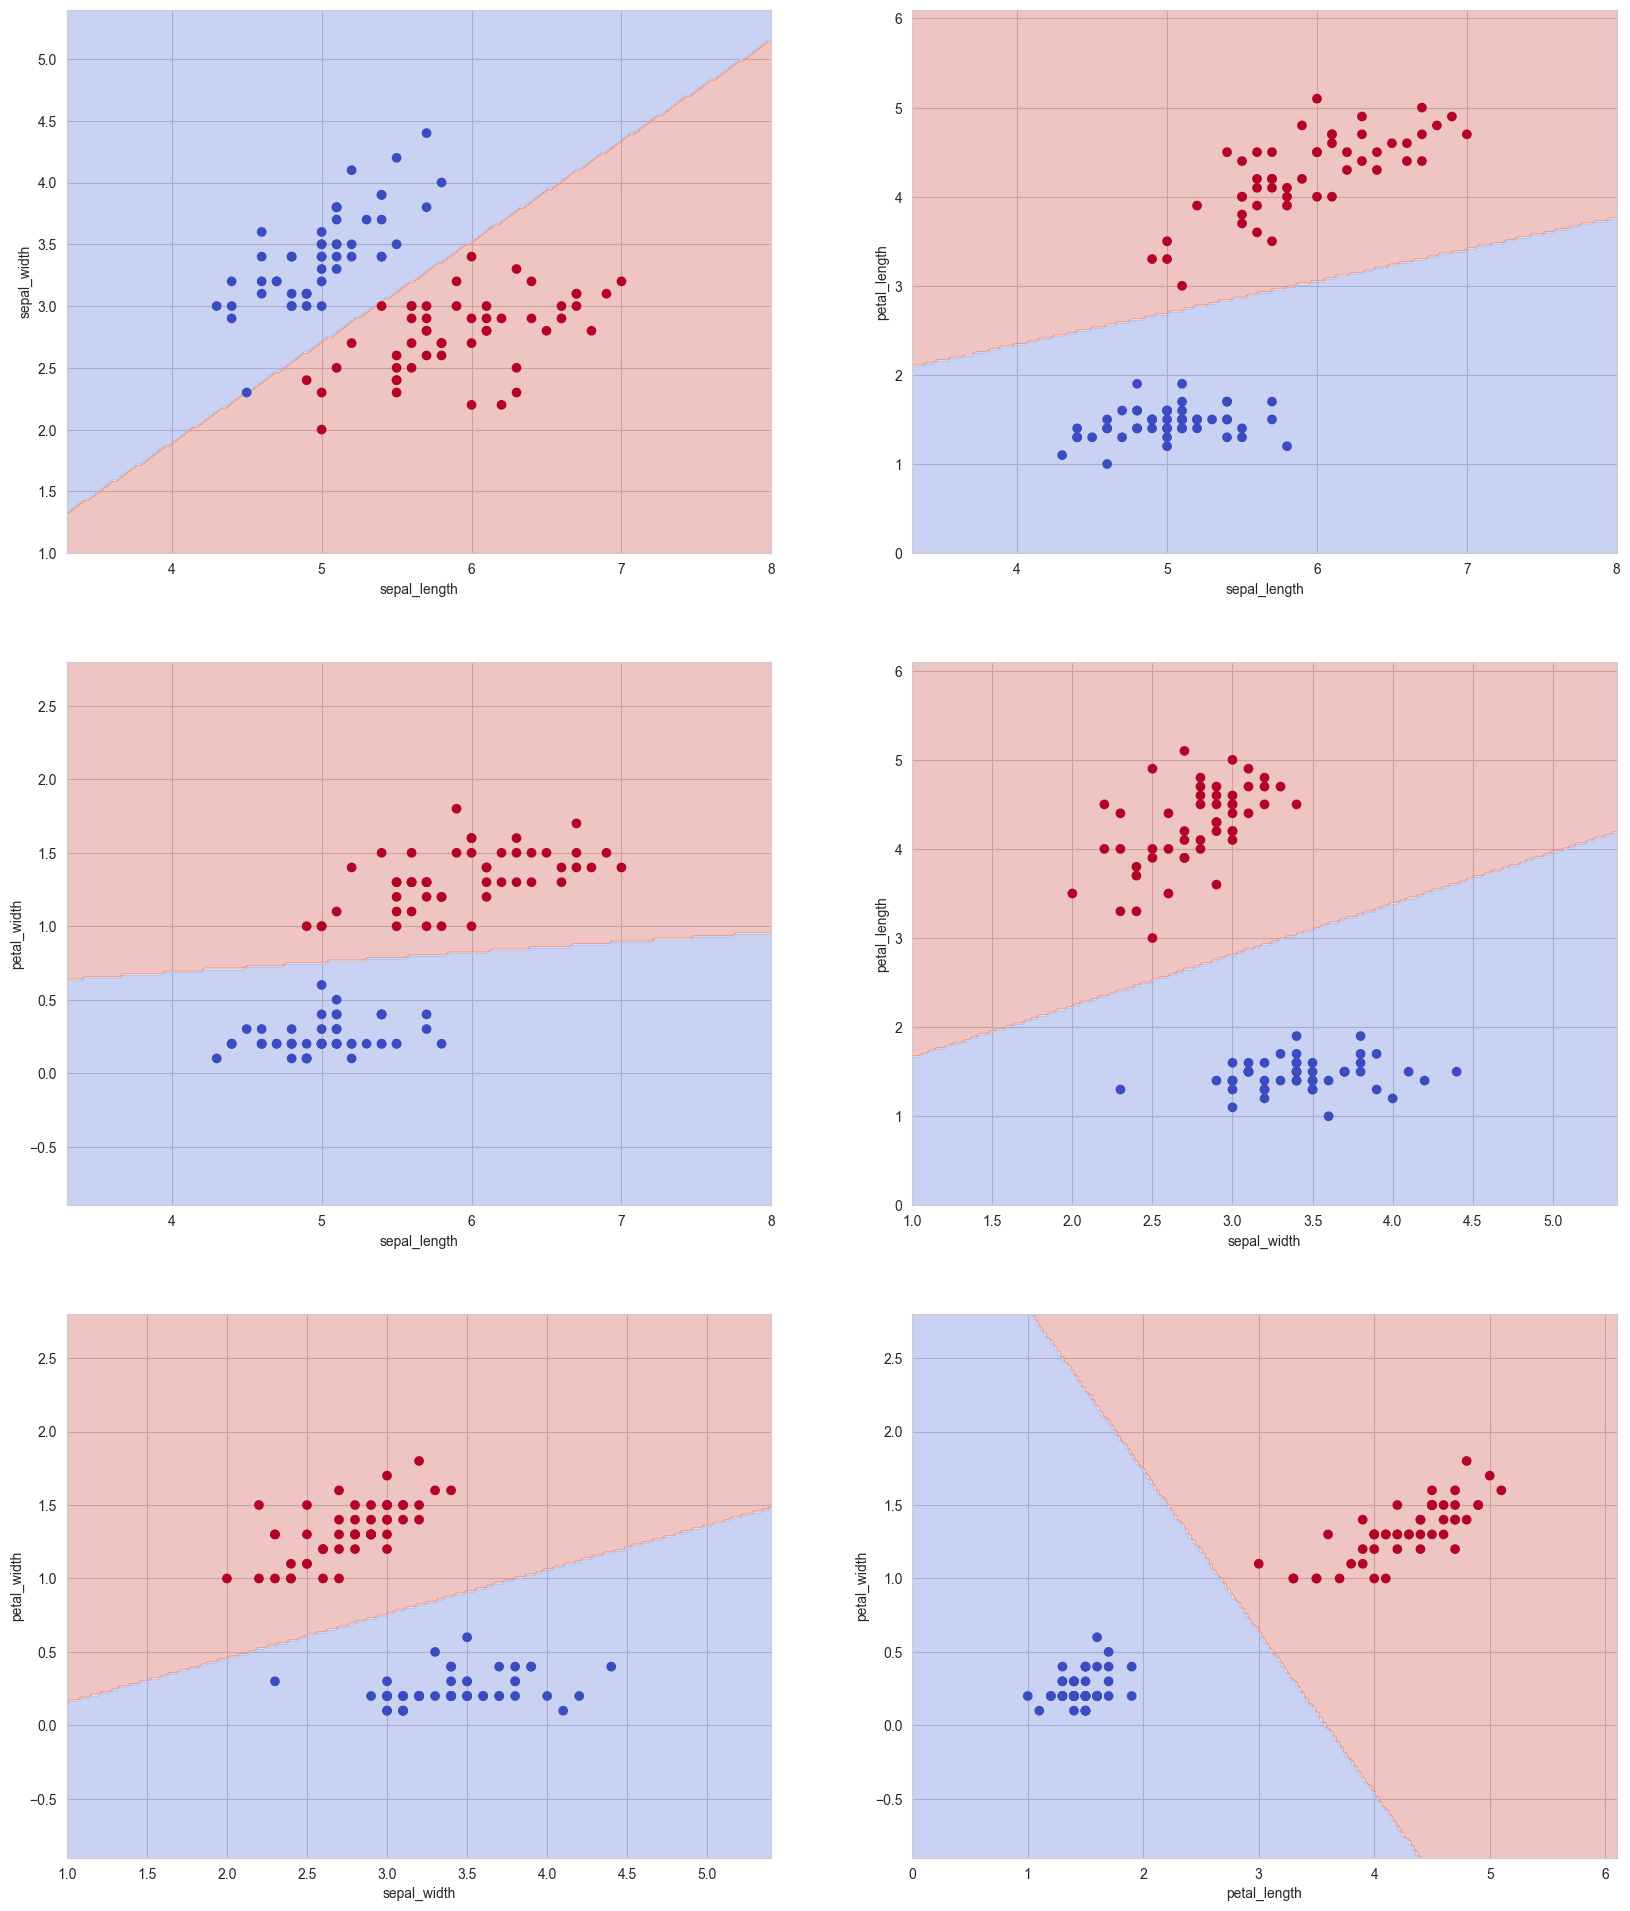

In [6]:
classes = [0, 1]
feature_names = iris.axes[1].tolist()[:-1]

y = np.array([i[-1] for i in iris.values.tolist() if i[-1] in classes])

lda = LinearDiscriminantAnalysis()
combinations = itertools.combinations([0, 1, 2, 3], 2)

plt.figure(figsize=(20, 24))
k = 1

for i, j in combinations:
    x = np.array([[t[i], t[j]] for t in iris.values.tolist() if t[-1] in classes])

    lda.fit(x, y)

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    res = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    res = res.reshape(xx.shape)

    plt.subplot(3, 2, k)
    k += 1

    plt.contourf(xx, yy, res, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])

plt.show()

[6] Для одной из пар количественных признаков из пункта [5] на одном рисунке
одновременно построить (а) решающую функцию LDA и (б) линейную регрессию
одного количественного признака от другого.

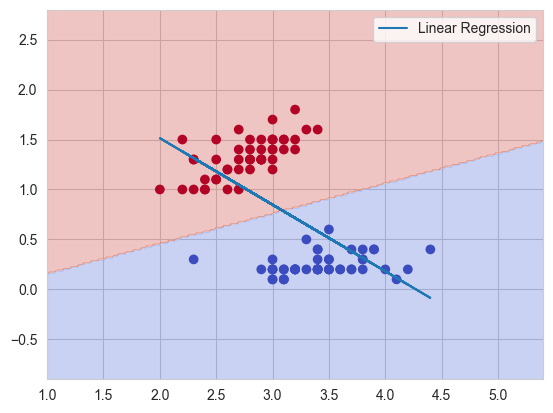

In [7]:
classes = [0, 1]

y = np.array([i[-1] for i in iris.values.tolist() if i[-1] in classes])
x = np.array([[i[1], i[3]] for i in iris.values.tolist() if i[-1] in classes])

x_lr = np.array([i[1] for i in iris.values.tolist() if i[-1] in classes]).reshape(-1, 1)
y_lr = np.array([i[3] for i in iris.values.tolist() if i[-1] in classes])

lda = LinearDiscriminantAnalysis()
lda.fit(x, y)

lr = LinearRegression()
lr.fit(x_lr, y_lr)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

lda_pred = lda.predict(np.c_[xx.ravel(), yy.ravel()])
lda_pred = lda_pred.reshape(xx.shape)

lr_pred = lr.predict(x_lr)

plt.contourf(xx, yy, lda_pred, alpha=0.3, cmap=plt.cm.coolwarm)
plt.plot(x_lr, lr_pred, label='Linear Regression')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.legend()
plt.show()

[7] Выбрать два количественных признака и пару целевых классов
На отдельных рисунках с осями количественных признаков построить решающие функции, разграниченные решающей функцией зоны и отдельные объекты классов для методов (а) LDA, (б) SVM, (в) логистическая регрессия, (г) наивный байесовский классификатор

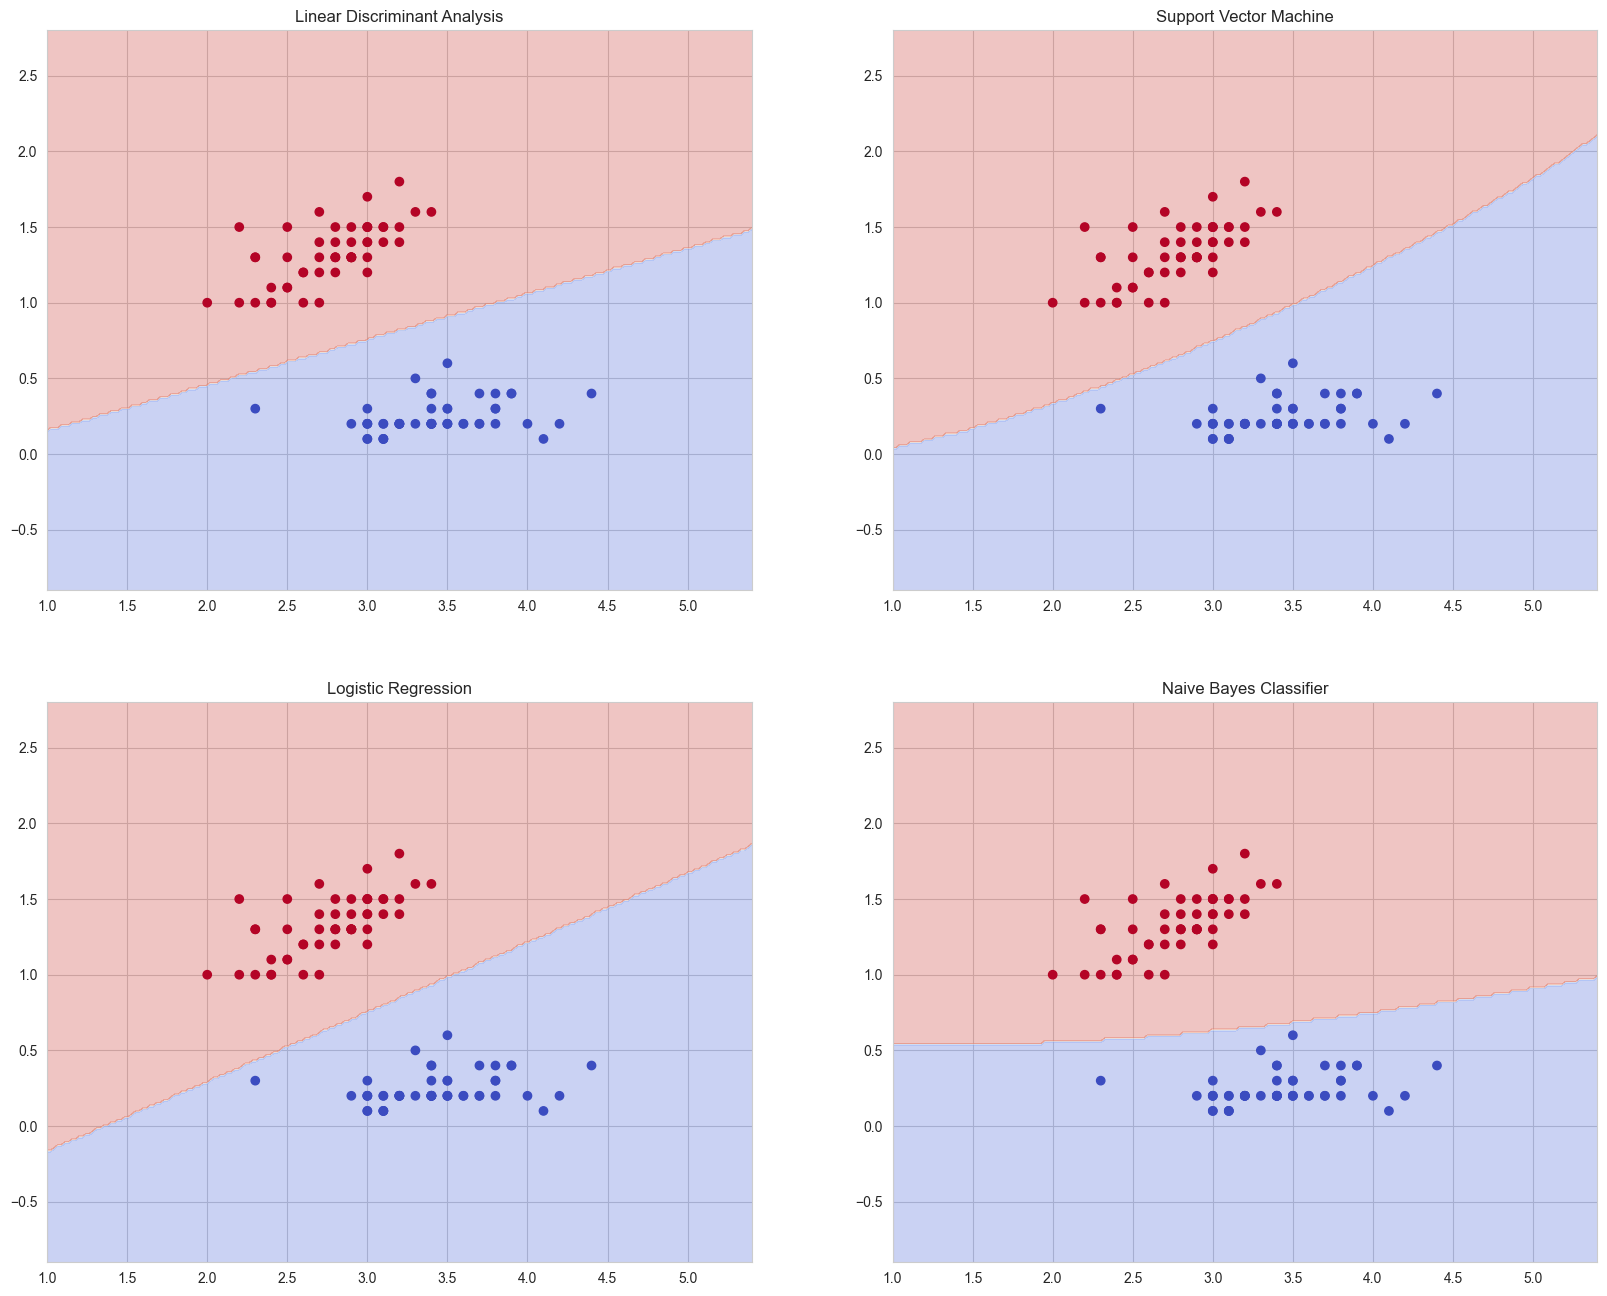

In [10]:
model_names = ['Linear Discriminant Analysis', 'Support Vector Machine', 'Logistic Regression', 'Naive Bayes Classifier']
classes = [0, 1]
features = [2, 3]

y = np.array([i[-1] for i in iris.values.tolist() if i[-1] in classes])
x = np.array([[i[1], i[3]] for i in iris.values.tolist() if i[-1] in classes])

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

lda = LinearDiscriminantAnalysis()
svm = SVC()
log_reg = LogisticRegression()
nbc = GaussianNB()

plt.figure(figsize=(20, 16))
models = [lda, svm, log_reg, nbc]
t = 1

for model in models:
    model.fit(x, y)
    pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)

    plt.subplot(2, 2, t)
    t += 1

    plt.contourf(xx, yy, pred, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title(model_names[t - 2])

plt.show()

[8] Выбрать целевой класс и для каждого метода из пункта [7]:
- Вывести матрицу ошибок.
- Вывести значения sensitivity, specificity, precision, recall.
- Построить ROC кривую и рассчитать метрику AUC.

Statistics for Linear Discriminant Analysis model:

TP: 50 FN: 0
FP: 0 TN: 50

Precision: 1.0
Recall: 1.0
Sensitivity: 1.0
Specificity: 1.0
Auc: 1.0
____________
Statistics for Support Vector Machine model:

TP: 50 FN: 0
FP: 0 TN: 50

Precision: 1.0
Recall: 1.0
Sensitivity: 1.0
Specificity: 1.0
Auc: 1.0
____________
Statistics for Logistic Regression model:

TP: 50 FN: 0
FP: 0 TN: 50

Precision: 1.0
Recall: 1.0
Sensitivity: 1.0
Specificity: 1.0
Auc: 1.0
____________
Statistics for Naive Bayes Classifier model:

TP: 50 FN: 0
FP: 0 TN: 50

Precision: 1.0
Recall: 1.0
Sensitivity: 1.0
Specificity: 1.0
Auc: 1.0
____________


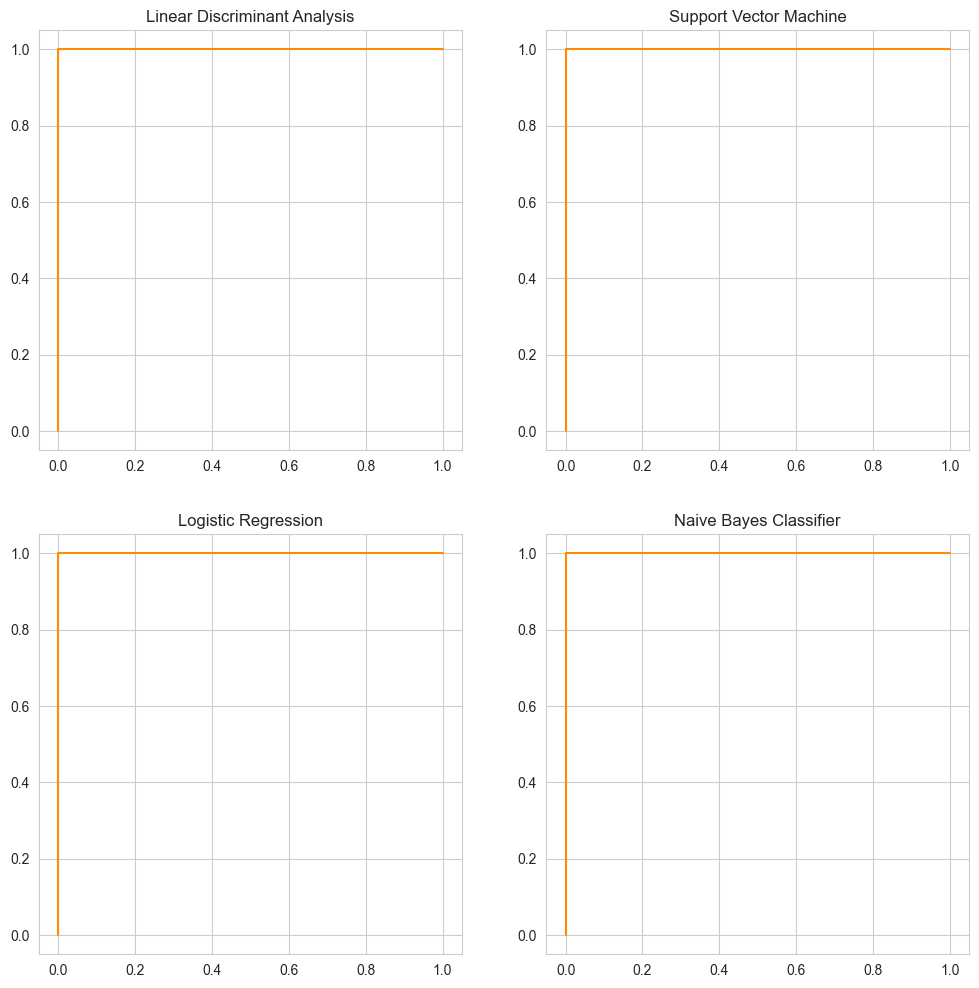

In [11]:
metrics = []
plt.figure(figsize=(12, 12))

for i in range(len(models)):
    pred = models[i].predict(x)

    matrix = confusion_matrix(y, pred)

    tp = matrix[0][0]
    fp = matrix[1][0]
    fn = matrix[0][1]
    tn = matrix[1][1]

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    sensitivity = recall
    specificity = tn / (tn + fp)

    fpr, tpr, thresh = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    metrics.append([matrix, precision, recall, sensitivity, specificity, roc_auc])

    plt.subplot(2, 2, i + 1)
    plt.plot(fpr, tpr, color='darkorange')
    plt.title(model_names[i])

for i in range(len(metrics)):
    print(f'Statistics for {model_names[i]} model:\n')
    print(f'TP: {metrics[i][0][0][0]} FN: {metrics[i][0][0][1]}\nFP: {metrics[i][0][1][0]} TN: {metrics[i][0][1][1]}\n')
    print(f'Precision: {metrics[i][1]}\nRecall: {metrics[i][2]}\nSensitivity: {metrics[i][3]}\nSpecificity: {metrics[i][4]}\nAuc: {metrics[i][5]}')
    print('____________')